In [63]:
import numpy as np
import sympy as sp
from sympy.plotting import plot
import matplotlib.pyplot as plt

### 1.
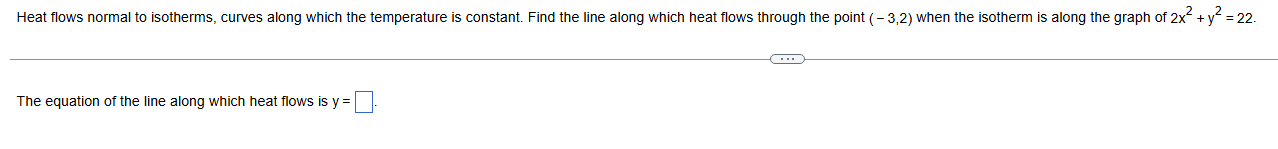

In [64]:
# Find the derivative of x
x,y = sp.symbols('x, y')
xi = -3
yi = 2

expr = 2*x**2 + y**2 - 22
diff = sp.solve(expr,y)[0].diff() #First solve for y, then differentiate for x
diff

2*x/sqrt(22 - 2*x**2)

In [65]:
diff.subs(x, xi)

-3

In [66]:
#Implicit differentiation is a bit more complicated in sympy
x,y,m,b = sp.symbols('x, y, m, b')
fyx = sp.Function('y')(x)
dfyx = sp.Derivative(fyx, x)
xi = 3
yi = 5

expr = 2*x**2 + y**2 - 43
expr

2*x**2 + y**2 - 43

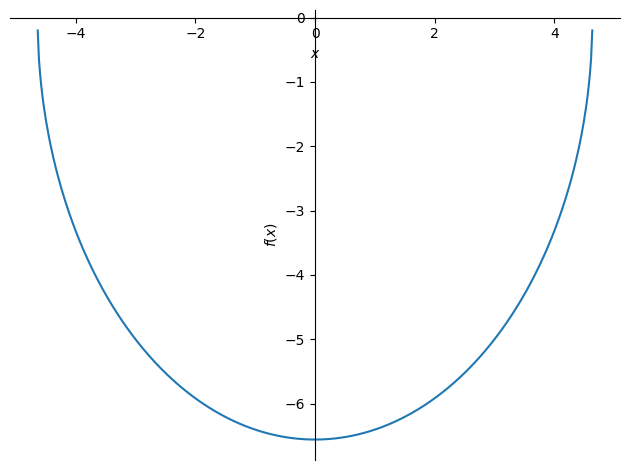

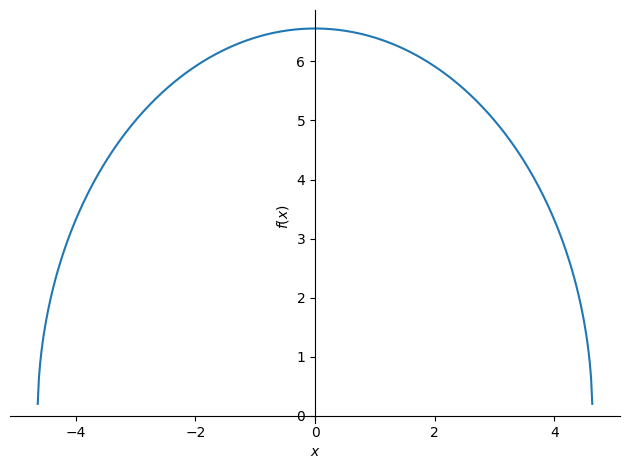

In [67]:
for sol in sp.solve(expr, y):
    sp.plot(sol)

In [68]:
#Treat y as a function of x, then differentiate for x
diff2 = expr.subs(y, fyx).diff() 
diff2

4*x + 2*y(x)*Derivative(y(x), x)

In [69]:
# Solve for dy/dx
diff2_solved = sp.solve(diff2, dfyx)[0]
diff2_solved

-2*x/y(x)

In [70]:
# Evaluate at the given point
slope = diff2_solved.subs({fyx: yi, x:xi})
slope

-6/5

$ y = mx+b $

In [71]:
line = sp.Eq(y, m*x+b)
line

Eq(y, b + m*x)

In [72]:
intercept = sp.solve(line,b)[0]
intercept

-m*x + y

In [73]:
bi_tangent = intercept.subs({
    m: slope,
    x: xi,
    y: yi
})
bi_tangent

43/5

In [74]:
tangent = line.subs({
    m: slope,
    b: bi_tangent
})
tangent

Eq(y, 43/5 - 6*x/5)

In [75]:
bi_normal = intercept.subs({
    m: -slope**-1,
    x: xi,
    y: yi
})
bi_normal

5/2

In [76]:
normal = line.subs({
    m: -slope**-1,
    b: bi_normal
})
normal

Eq(y, 5*x/6 + 5/2)

Example:

In [77]:
x,y = sp.symbols('x, y')

expr = 2*x**2 + y**2 -12

sp.solve(expr,y)[0].diff().subs(x,2)

2

### 2
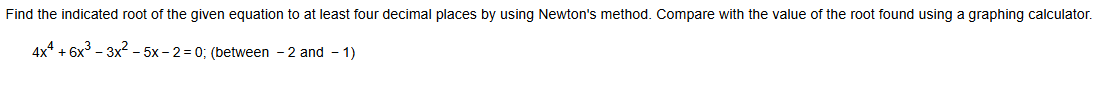

**Newton's Method** is an iterative algorithm for approximating the roots of a function. The underlying premise is that if you draw a tangent line to a point on a graph, the x-intercept of the tangent line will be closer to the root than the initial point. You can then repeat the process, and the next tangent line will be even closer. This can be expressed mathematically with the expression.
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

The following shows how to derive this formula:

In [78]:
# Start with point-slope form
x, x1, y, y1, m = sp.symbols('x, x_1, y, y_1, m')
f = sp.Function('f')
point_slope = sp.Eq(y-y1, m*(x-x1))
point_slope

Eq(y - y_1, m*(x - x_1))

In [79]:
# Solve for x when y is 0.
# That is your x intercept.
x_intercept = sp.solve(point_slope.subs(y, 0), x)[0]
x_intercept

x_1 - y_1/m

In [80]:
x_intercept.subs({
    y1: f(x1),          # Express y1 as a function of x1
    m: f(x1).diff(),    # And the slope is the derivative of that function
})

x_1 - f(x_1)/Derivative(f(x_1), x_1)

Apply this to our problem

In [81]:
# Define symbol and function
x = sp.symbols('x')
f = 4*x**4 +6*x**3 -3*x**2 -5*x -2

# Compute the derivative symbolically
f_prime = sp.diff(f, x)

# Convert to numerical functions
f_num = sp.lambdify(x, f, 'numpy')
f_prime_num = sp.lambdify(x, f_prime, 'numpy')

# Newton's method
def newton_method(f, f_prime, x0, tol=1e-6, max_iter=20):
    x_n = x0
    for i in range(max_iter):
        f_xn = f(x_n)
        f_prime_xn = f_prime(x_n)
        if f_prime_xn == 0:
            raise ZeroDivisionError("Derivative is zero. No convergence.")
        x_next = x_n - f_xn / f_prime_xn
        print(f"Step {i+1}: x = {x_next}")
        if abs(x_next - x_n) < tol:
            return x_next
        x_n = x_next
    raise RuntimeError("Newton's method did not converge.")

# Run it
root = newton_method(f_num, f_prime_num, x0=-1.5)
print("Root:", root)


Step 1: x = -1.631578947368421
Step 2: x = -1.6043130807138217
Step 3: x = -1.602789331120406
Step 4: x = -1.6027847152425692
Step 5: x = -1.602784715200295
Root: -1.602784715200295


### 3
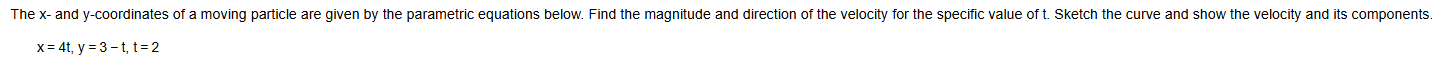

In [82]:
x,y,t = sp.symbols('x,y,t')
fx = 4*t
fy = 3-t
t0 = 2 # Both functions are linear so this doesn't matter

In [83]:
np.hypot(3,-1) #magnitude

np.float64(3.1622776601683795)

In [84]:
np.degrees(-1/3)+360

np.float64(340.90140682897254)

### 4
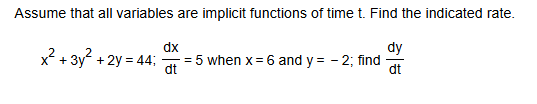

Note: this was much easier by hand.

In [85]:
expr = x**2 +3*y**2 +2*y -44
expr

x**2 + 3*y**2 + 2*y - 44

In [86]:
expr.free_symbols

{x, y}

In [87]:
wrt = t
funcs = {}
syms = {}
for var in expr.free_symbols:
    func = sp.Function(str(var))(wrt)
    funcs[var] = func
    syms[func] = var

f_expr = expr.subs(funcs)
f_expr

x(t)**2 + 3*y(t)**2 + 2*y(t) - 44

In [88]:
f_expr.diff(t)

2*x(t)*Derivative(x(t), t) + 6*y(t)*Derivative(y(t), t) + 2*Derivative(y(t), t)

In [89]:
sol = sp.solve(f_expr.diff(t), funcs[y].diff())[0]
sol

-x(t)*Derivative(x(t), t)/(3*y(t) + 1)

In [90]:
sol.subs({
    funcs[x].diff(): 5,
    funcs[x]: 6,
    funcs[y]: -2,
})

6

### 5
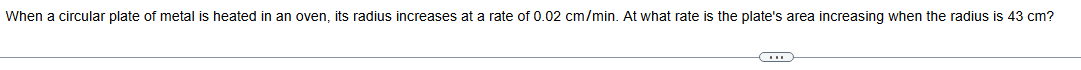

### 6
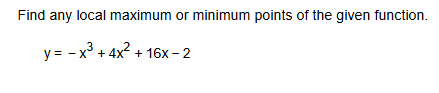

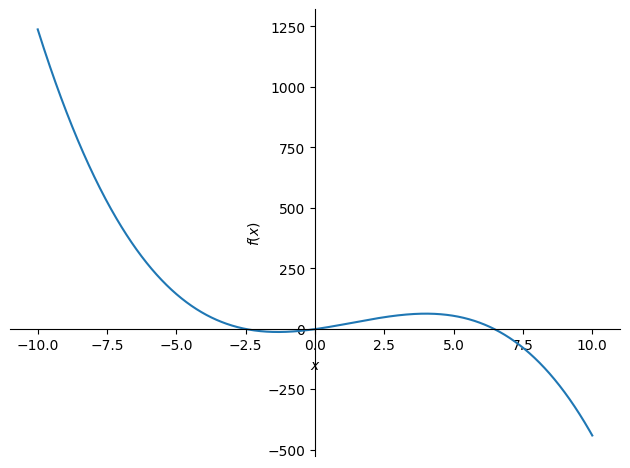

In [91]:
expr = -x**3 +4*x**2 +16*x -2
sp.plot(expr)

When the slope is 0, it is likely that on that point lies a minimum or maximum.

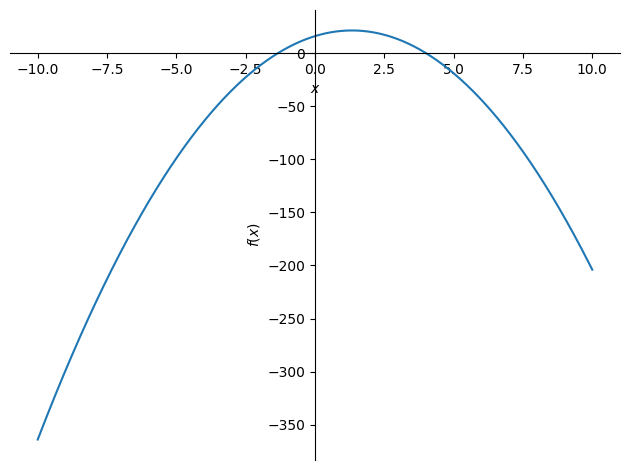

In [92]:
sp.plot(expr.diff())

In [93]:
sp.solve(expr.diff().factor(), x)

[-4/3, 4]

In [94]:
# Here's what the derivative looks like
display(expr.diff())
display(expr.diff().factor()) # Easier to solve for 0 when factored

-3*x**2 + 8*x + 16

-(x - 4)*(3*x + 4)

In [95]:
# Unless your working with an explicit equality with sp.Eq()
# sp.solve() assumes an expression = 0
for sol in sp.solve(expr.diff().factor(), x):
    display(expr.subs(x, sol))

-374/27

62

### Theory for q6

To find the **maximum** and **minimum points** (also called **extrema**) of a function, you typically follow these steps:

---

#### 🔹 **1. Take the derivative**

Let’s say you have a function $f(x)$.  
Compute its first derivative:

$$
f'(x)
$$

This tells you the **slope** of the function at each point.

---

#### 🔹 **2. Set the derivative equal to zero**

Solve:

$$
f'(x) = 0
$$

The solutions are called **critical points**. These are candidates for maxima, minima, or saddle points (points where the slope is zero, but there's no extremum).

---

#### 🔹 **3. Use the second derivative test (optional but helpful)**

Take the second derivative:

$$
f''(x)
$$

Evaluate it at each critical point:

- If $f''(x) > 0$, the graph is **concave up** → **local minimum**
- If $f''(x) < 0$, the graph is **concave down** → **local maximum**
- If $f''(x) = 0$, the test is **inconclusive**

---

#### 🔹 **4. (Optional) Check endpoints or behavior at infinity**

If you're finding extrema over a **closed interval**, also evaluate $f(x)$ at the **endpoints**.

If you're working on the **entire real line**, consider the **limits** as $x \to \pm\infty$ to check for global extrema.

---

#### ✅ **Example**

Let’s say:

$$
f(x) = x^3 - 3x^2 + 2
$$

**Step 1:**

$$
f'(x) = 3x^2 - 6x
$$

**Step 2:**

$$
3x^2 - 6x = 0 \Rightarrow x( x - 2 ) = 0 \Rightarrow x = 0,\ 2
$$

**Step 3:**

$$
f''(x) = 6x - 6
$$

- At $x = 0$: $f''(0) = -6$ → **local maximum**
- At $x = 2$: $f''(2) = 6$ → **local minimum**


### 7
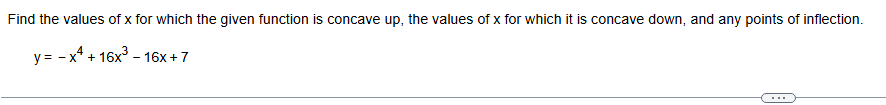

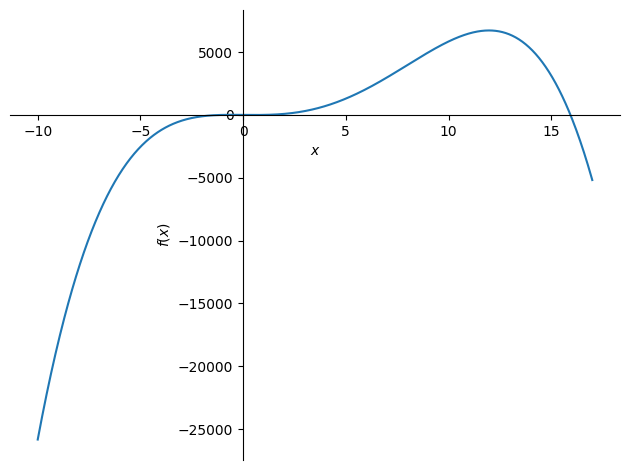

In [96]:
expr = -x**4 +16*x**3 -16*x +7
sp.plot(expr, (x, -10, 17))

In [97]:
d2 = expr.diff(x, 2)
d2

12*x*(8 - x)

In [98]:
sols = sp.solve(d2, x)
for sol in sols:
    display((sol, expr.subs(x,sol)))

(0, 7)

(8, 3975)

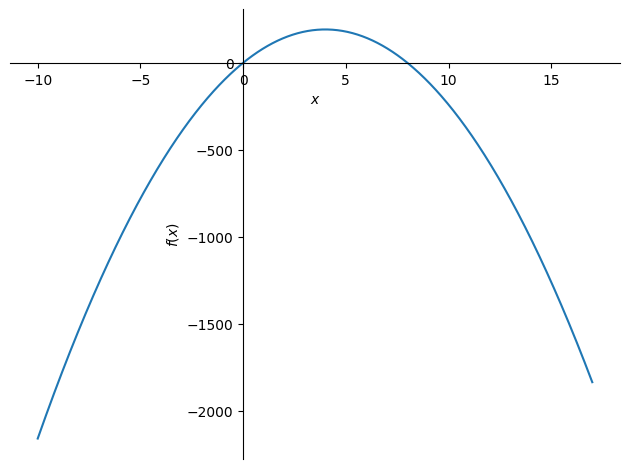

In [99]:
sp.plot(d2, (x, -10, 17))

The intervals in which the second derivative $f''(x)$ are positive are the intervals in which $f(x)$ is concave up.  
In this problem, the interval $[0,8]$ is concave up and the rest is concave down.

### 8
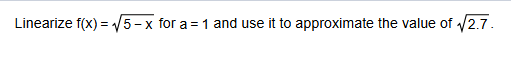

$$
L(x) = f(a) + f'(a)(x-a)
$$

In [100]:
y_1, y_2, x_1, x_2, m = sp.symbols('y_1, y_2, x_1, x_2, m')
point_slope = sp.Eq(y_1 - y_2, m*(x_1 - x_2))
point_slope

Eq(y_1 - y_2, m*(x_1 - x_2))

In [101]:
f = sp.Function('f')
L = sp.Function('L')
a = sp.symbols('a')
Linear_approximation = point_slope.subs({
    y_1: L(x),
    y_2: f(a),
    m: f(a).diff(),
    x_1: x,
    x_2: a
})
Linear_approximation

Eq(L(x) - f(a), (-a + x)*Derivative(f(a), a))

In [102]:
expr = sp.sqrt(5-x)
a = 1
L = \
    expr.subs(x, a) +\
    expr.diff().subs(x, a) *\
    (x - a)
display(L)

9/4 - x/4

In [103]:
display(L.subs(x, 5-2.7), np.sqrt(2.7)) 

1.67500000000000

np.float64(1.6431676725154984)

### 9
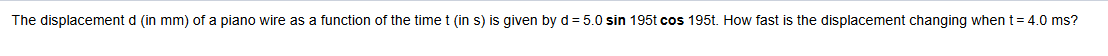

In [104]:
j = 4
k = 179
t = 4e-3
expr = j*sp.sin(k*x)*sp.cos(k*x)
display(expr)
display(expr.diff())

4*sin(179*x)*cos(179*x)

-716*sin(179*x)**2 + 716*cos(179*x)**2

In [105]:
expr.diff().subs(x, t).evalf()

99.0594000462877

### 10
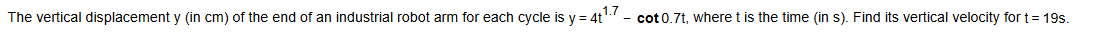

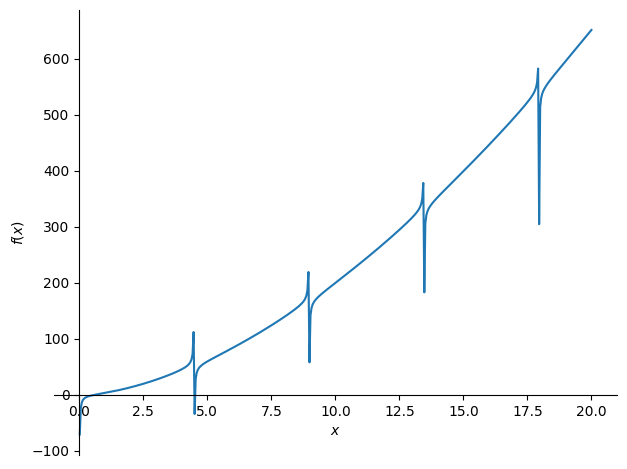

4*x**1.7 - cot(0.7*x)

In [106]:
t = 19 #seconds
expr = 4*x**1.7 - sp.cot(0.7*x)
sp.plot(expr, (x, -20, 20))
display(expr)
# I do not want to be anywhere near that robot arm

In [107]:
# Velocity is derivative of displacement
display(expr.diff())
expr.diff().subs(x, t)

6.8*x**0.7 + 0.7*cot(0.7*x)**2 + 0.7

54.9730759355908

### 11
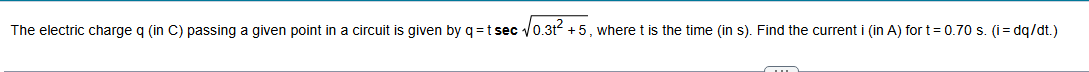

Question changed, not sure why:  
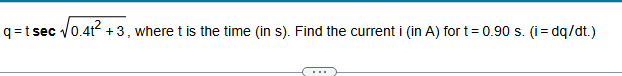

In [108]:
t = sp.symbols('t')
t_x = 0.9
expr = t *sp.sec(sp.sqrt(t**2*0.4+3))
expr

t*sec(sqrt(3)*sqrt(0.133333333333333*t**2 + 1))

In [109]:
expr.diff()

0.133333333333333*sqrt(3)*t**2*tan(sqrt(3)*sqrt(0.133333333333333*t**2 + 1))*sec(sqrt(3)*sqrt(0.133333333333333*t**2 + 1))/sqrt(0.133333333333333*t**2 + 1) + sec(sqrt(3)*sqrt(0.133333333333333*t**2 + 1))

In [110]:
expr.diff().subs(t, t_x).evalf()

-1.24499136909814

### 12
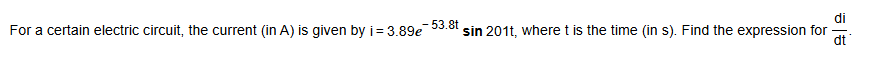

$$
f(x) = be^{ax} \cdot \sin(cx)
$$

In [111]:
expr = 3.89*sp.E**(-53.8*t) *sp.sin(201*t)
expr

3.89*exp(-53.8*t)*sin(201*t)

In [112]:
expr.diff()

-209.282*exp(-53.8*t)*sin(201*t) + 781.89*exp(-53.8*t)*cos(201*t)

### 13
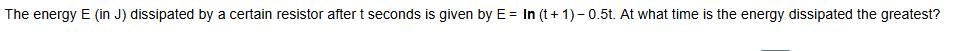

In [113]:
expr = sp.log(t+1)-0.5*t
expr

-0.5*t + log(t + 1)

In [114]:
expr.diff()

-0.5 + 1/(t + 1)

In [115]:
sp.solve(expr.diff(), t)

[1.00000000000000]

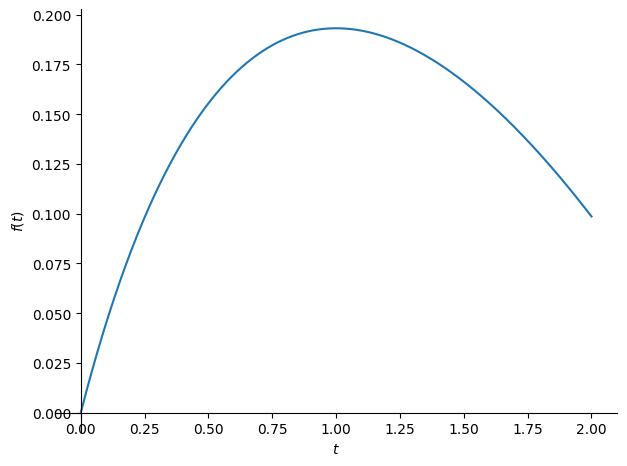

In [116]:
sp.plot(expr, (t, 0, 2))

### 14
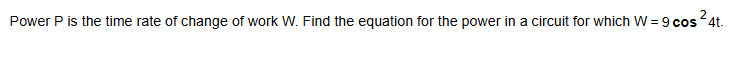

In [117]:
expr = 9*sp.cos(4*t)**2
expr

9*cos(4*t)**2

In [118]:
sp.latex(expr)

'9 \\cos^{2}{\\left(4 t \\right)}'

In [119]:
expr.diff()

-72*sin(4*t)*cos(4*t)

### 15
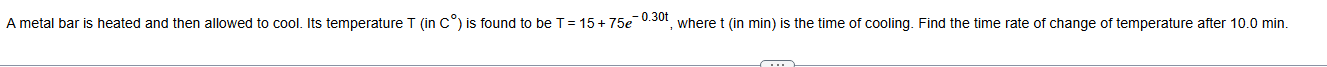

In [120]:
my_guess = 75*(-0.3)*sp.E**((-0.3)*t)
my_guess

-22.5*exp(-0.3*t)

In [121]:
expr = 15 + 75*sp.E**(-.3*t)
expr.diff()

-22.5*exp(-0.3*t)

In [122]:
expr.diff().subs(t,10)

-1.12020903827694

## Discussion

Deriving the formula for capacitive reactance

$$
I = C \frac{dV}{dt}
$$

$$\Large
\underbrace{E = \frac{1}{2} kS^2}_\text{Spring}
\quad \sim \quad
\underbrace{E = \frac{1}{2} CV^2}_\text{Capacitor}
$$

In [17]:
import sympy as sp

# Define symbols
t, f, C, V0 = sp.symbols('t f C V_0', real=True, positive=True)

# Define voltage as a sine wave
V = V0 * sp.sin(2 * sp.pi * f * t)
V

V_0*sin(2*pi*f*t)

In [22]:
# Differentiate voltage to find current
I = C * sp.diff(V, t)
I

2*pi*C*V_0*f*cos(2*pi*f*t)

In [23]:
Xc = sp.symbols('X_c')
I0 = sp.symbols('I_0')
I.subs(V0, I0*Xc)

2*pi*C*I_0*X_c*f*cos(2*pi*f*t)

In [14]:
solution = sp.solve(eq, V0/I0)
solution

[]

In [ ]:

# Simplify the expression
I_simplified = sp.simplify(I)

# Extract amplitude of I (i.e., coefficient of sin/cos)
I0 = sp.factor(I_simplified).args[0]  # amplitude is the scalar multiplier

# Define X_C as V0 / I0
X_C = V0 / I0
X_C_simplified = sp.simplify(X_C)

# Display results
display(V)
display(I_simplified)
display(I0)
display(X_C_simplified)
